### Post-prosessing for HPC paper

In [1]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2
import csv, random, os
import pybamm as pb;import pandas as pd;import numpy as np;
import os, json,openpyxl,traceback,multiprocessing,scipy.optimize
import matplotlib.pyplot as plt;
import imageio,timeit,random,time, signal
from scipy.io import savemat,loadmat;
from pybamm import constants,exp;import matplotlib as mpl; 
fs=17; 
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [2]:
from scripts.HPC_Li_et_al.ParaSweeper.Fun_HPC import *

In [40]:
Root_Path = os.path.expanduser(
   "~/EnvPB_Linux/PyBaMM/scripts/HPC_Li_et_al/HPC_Paper_SimSave/Results")
rows_per_file = 4;  Scan_end_end = 1000;
purpose_i = "Sweep_Age"
BasicPath = os.path.join(Root_Path, purpose_i)
print(BasicPath)

/home/ruihe_li/EnvPB_Linux/PyBaMM/scripts/HPC_Li_et_al/HPC_Paper_SimSave/Results/Sweep_Age


In [4]:
Copy_png(Root_Path,rows_per_file,Scan_end_end,purpose_i)

In [41]:
workbook = openpyxl.Workbook() 
sheet = workbook.active  
sheet_title = "Summary" 
sheet.title = sheet_title
target_file = BasicPath+f"/Summary_{purpose_i}.xlsx"
workbook.save(target_file )
print("Create the summary file.")
workbook.close()

Scan_start = 1 ; Scan_end =  rows_per_file

Scan_start_all = (
    np.arange(Scan_start,Scan_end_end+1,rows_per_file)
    ).tolist()
Scan_end_all = (
    np.arange(Scan_start+rows_per_file-1,Scan_end_end+rows_per_file,rows_per_file)
    ).tolist()
excel_name = f"Summary_{purpose_i}"; 
i_succ = 14;
Collect_single_to_Big(Scan_start_all,Scan_end_all,i_succ,BasicPath,excel_name,sheet_title,purpose_i)

Create the summary file.
Successfuly write results for Scan 1!
Successfuly write results for Scan 2!
Successfuly write results for Scan 3!
Successfuly write results for Scan 4!
Successfuly write results for Scan 5!
Successfuly write results for Scan 6!
Successfuly write results for Scan 7!
Successfuly write results for Scan 8!
Successfuly write results for Scan 9!
Successfuly write results for Scan 10!
Successfuly write results for Scan 11!
Successfuly write results for Scan 12!
Successfuly write results for Scan 13!
Successfuly write results for Scan 14!
Successfuly write results for Scan 15!
Successfuly write results for Scan 16!
Successfuly write results for Scan 17!
Successfuly write results for Scan 18!
Successfuly write results for Scan 19!
Successfuly write results for Scan 20!
Successfuly write results for Scan 21!
Successfuly write results for Scan 22!
Successfuly write results for Scan 23!
Successfuly write results for Scan 24!
Successfuly write results for Scan 25!
Successfu

In [42]:
# load the results, carry out sensitivity analysis
result_df = pd.read_excel(BasicPath + f"/Summary_{purpose_i}.xlsx")
result_df

,Scan No,Y or N,Error %,Punish,Dry out,Scan No.1,Outer SEI solvent diffusivity [m2.s-1],Dead lithium decay constant [s-1],Lithium plating kinetic rate constant [m.s-1],Negative electrode LAM constant proportional term [s-1],...,LLI to LiP [%],LLI to SEI [%],LLI to sei-on-cracks [%],LLI due to LAM [%],LAM_to_Crack_NE [%],LAM_to_Crack_PE [%],LAM_to_Dry [%],Error,Unnamed: 49,Unnamed: 50
0,1,Pass,2.04,1.00,On,1,1.441441e-21,0.000004,1.364865e-10,1.230631e-08,...,1.181564,1.714392,3.711981,9.544955,0.015937,5.329071e-15,9.515406,Empty,Empty,NaN
1,2,Fail,6.49,1.00,On,2,1.077077e-21,0.000002,8.078078e-11,1.663063e-08,...,0.414491,1.440154,3.119396,5.097769,0.022643,8.881784e-15,5.080023,Empty,Empty,NaN
2,3,Fail,9.03,1.00,On,3,7.390390e-21,0.000002,1.486486e-10,3.081081e-09,...,0.220161,2.902194,5.784386,19.228881,0.003490,1.421085e-14,19.114679,Empty,Empty,NaN
3,4,Pass,1.38,1.00,On,4,5.442442e-21,0.000003,1.420420e-10,8.972973e-09,...,0.430251,2.735405,5.466118,10.221046,0.011087,7.105427e-15,10.171540,Empty,Empty,NaN
4,5,Pass,1.30,1.00,On,5,4.895896e-21,0.000001,1.091592e-10,6.108108e-09,...,0.220140,2.640781,5.295058,10.806997,0.007528,1.776357e-14,10.758617,Empty,Empty,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,996,Pass,0.94,1.00,On,996,3.060060e-21,0.000001,1.244745e-10,1.248649e-08,...,0.279624,2.252109,4.611654,10.384435,0.015618,-5.329071e-15,10.343615,Empty,Empty,NaN
932,997,Fail,880.28,439.01,On,997,6.465465e-21,0.000002,1.884384e-10,2.000000e-08,...,0.004869,0.104341,0.285060,3.865618,0.000012,8.437695e-15,3.846155,Experiment error or infeasible,Empty,Simulation error: Error in Function::call for ...
933,998,Pass,2.56,1.00,On,998,5.988989e-21,0.000003,1.426426e-10,1.882883e-08,...,0.404840,2.805292,5.585120,11.772770,0.022924,1.243450e-14,11.707923,Empty,Empty,NaN
934,999,Fail,3.28,1.00,On,999,2.240240e-21,0.000002,8.003003e-11,1.553153e-08,...,0.284898,1.992423,4.125093,7.763903,0.020110,1.953993e-14,7.734922,Empty,Empty,NaN


In [43]:
column_mapping = {
    'Outer SEI solvent diffusivity [m2.s-1]':"D_sol", 
    'Dead lithium decay constant [s-1]': "Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Negative electrode LAM constant proportional term [s-1]':"beta_Ne",
    'Negative electrode cracking rate':"kcr_Ne",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
}
result_df = result_df.rename(columns=column_mapping)
result_df_pick1 = result_df[result_df["Error %"]<10]

In [20]:
# Find the best fit
sorted_result_df_pick1 = result_df_pick1.sort_values(by="Error %")
print(sorted_result_df_pick1["Scan No"][0:3])

861    926
435    500
406    471
Name: Scan No, dtype: int64


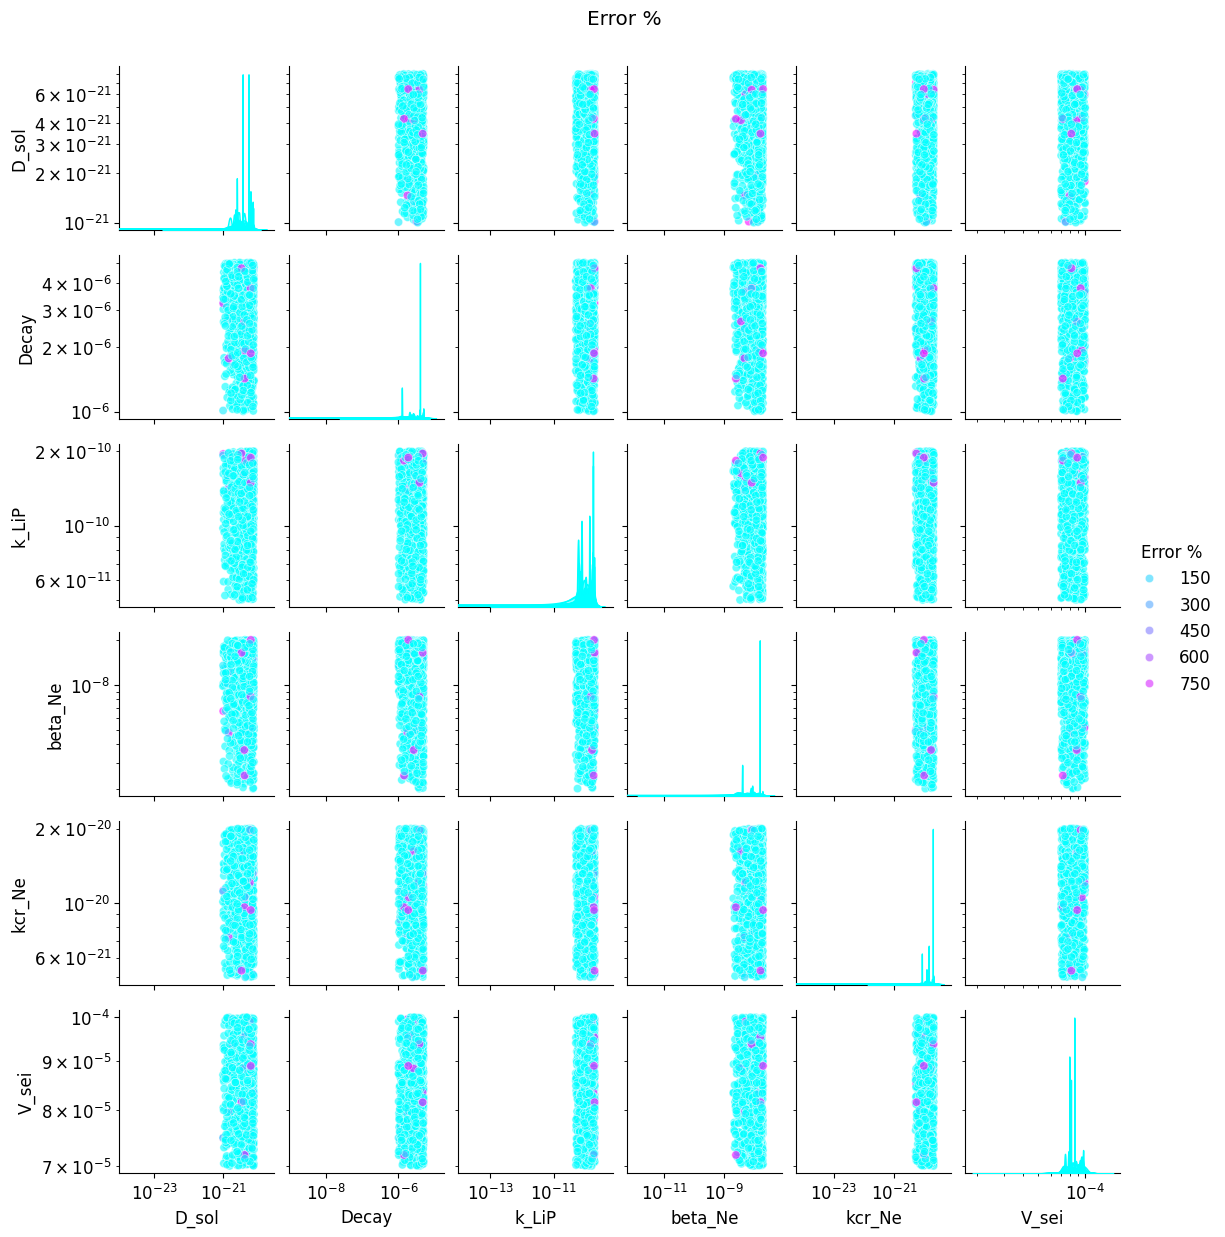

In [44]:
fs=12
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

def PlotPair(df, input_columns, output_column,plot_title, plot_size):
    import seaborn as sns
    # Create a DataFrame with only the input and output columns
    data_scale = df[input_columns + [output_column]]
    # Create the pair plot
    g = sns.pairplot(
        data_scale, vars=input_columns, hue=output_column,
        diag_kind='kde', plot_kws={'alpha': 0.6}, palette='cool', )

    # Set x-axis and y-axis scales to log scale
    for ax in g.axes.flat:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    g.fig.suptitle(plot_title, y=1.02)  # Adjust the title's position
    g.fig.set_size_inches(plot_size)

    return
input_columns = ["D_sol","Decay","k_LiP","beta_Ne","kcr_Ne","V_sei", ]

output_column = "Error %"     # SOH [%] LLI [%]	LLI to LiP [%]	LLI to SEI [%]	LLI to sei-on-cracks [%]	
#         LLI due to LAM [%]	LAM_to_Crack_NE [%]	LAM_to_Crack_PE [%]	LAM_to_Dry [%]  Error %
plot_size=(12,12);   colormap_scale = [0.38, 0.95]

PlotPair(result_df, input_columns, output_column,"Error %", plot_size)
# PlotPair(result_df_pick1, input_columns, output_column,"Error %", plot_size)

In [45]:
from SALib.analyze import sobol
df_a = result_df 
# step-1: get nested param_values 
Vars = ["D_sol","Decay","k_LiP","beta_Ne","kcr_Ne","V_sei", ] 
#        Extract columns from the dictionary
data_columns = [df_a[var] for var in Vars]
#        Create a nested NumPy array
param_values = np.array(data_columns).T  # Transpose to have rows as records
# step-2: get bounds:
Min_bound = [min(df_a[var]) for var in Vars]
Max_bound = [max(df_a[var]) for var in Vars]
param_bounds = [[min_val, max_val] for min_val, max_val in zip(Min_bound, Max_bound)]

problem = {
    'num_vars': len(Vars),
    'names': Vars,
    'bounds':param_bounds
}
Y = df_a["Error %"].values
print(len(param_values))
print(param_bounds)
print(len(df_a["Error %"].values))

936
[[1e-21, 7.992992992992993e-21], [1.004004004004004e-06, 5e-06], [5e-11, 2e-10], [2.018018018018018e-09, 2e-08], [5e-21, 2e-20], [7e-05, 0.0001]]
936


In [22]:
BasicPath

'/home/ruihe_li/EnvPB_Linux/PyBaMM/scripts/HPC_Li_et_al/HPC_Paper_SimSave/Results/Sweep_Age'

In [30]:
Si = sobol.analyze(problem,  Y, calc_second_order=False)

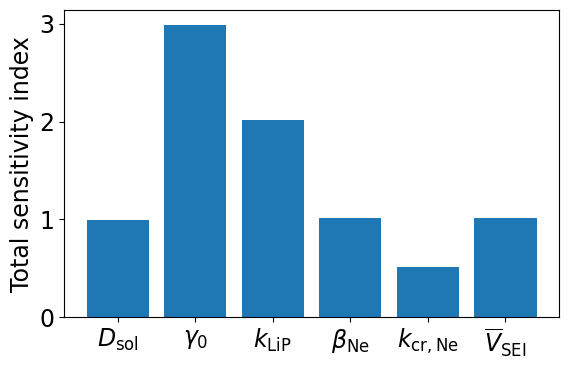

In [55]:
problem['names'] = [
    r'$\mathit{D}_\mathrm{sol}$',        # D_sol
    r'$\gamma_{0}$',                     # Decay, gamma_0
    r'$\mathit{k}_\mathrm{LiP}$',        # k_LiP
    r'$\beta_\mathrm{Ne}$',              # Negative electrode LAM constant proportional term [s-1]':"beta_Ne",
    r'$k_\mathrm{cr,Ne}$',               # 'Negative electrode cracking rate':"kcr_Ne",
    r"$\overline{V}_\mathrm{SEI}$",      # V_sei
    ]
dpi=800;   fs=17; 
font = {'family' : 'DejaVu Sans','size': fs}
mpl.rc('font', **font)
fig, axs = plt.subplots( figsize=(6,4),tight_layout=True) 
# Plot Total Sensitivity Indices
axs.bar(problem['names'], Si['ST'])
axs.set_ylabel('Total sensitivity index')
plt.savefig(BasicPath + "/Plot_Collect/" +f"Total sensitivity analysis.png", dpi=dpi)
plt.savefig(BasicPath + "/Plot_Collect/" +f"Total sensitivity analysis.svg")

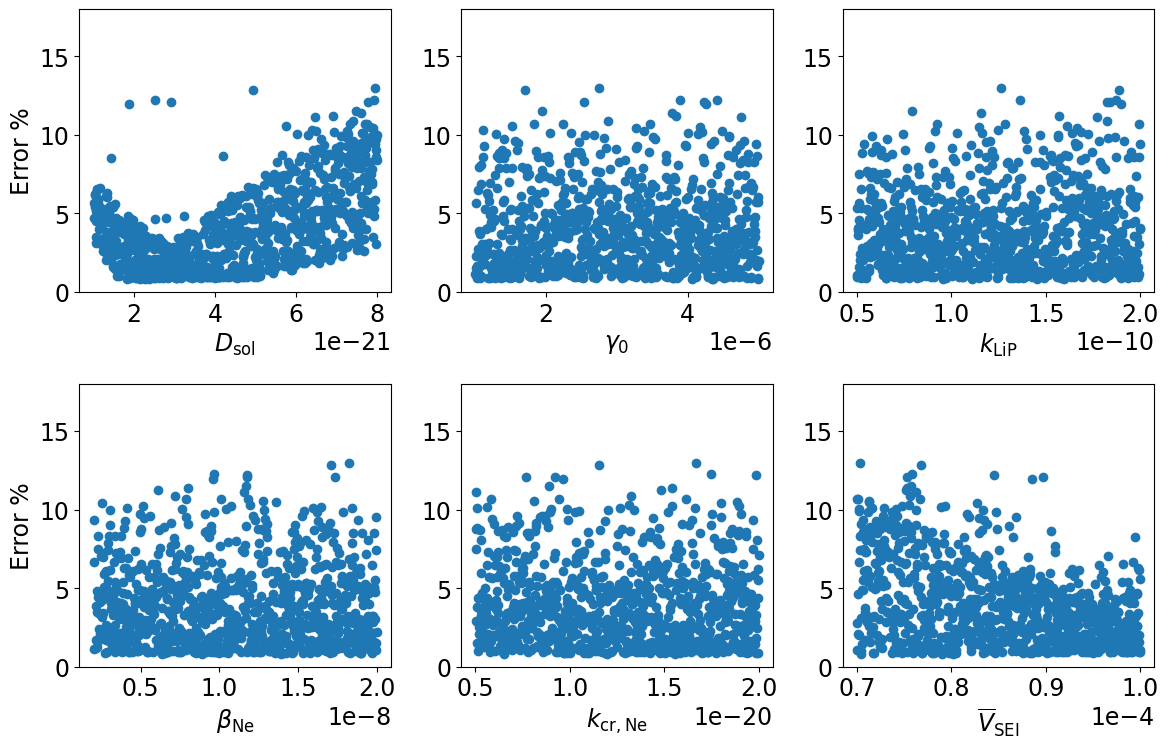

In [54]:
dpi=400;
fig, axs = plt.subplots(2,3, figsize=(12,7.8),tight_layout=True) 
axs = axs.flatten()
for j,var in enumerate(Vars):
    axs[j].plot(result_df[var],result_df["Error %"],"o")
    axs[j].set_xlabel(problem['names'][j])
    axs[j].set_ylim([0,18])
    axs[j].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
axs[0].set_ylabel("Error %")
axs[3].set_ylabel("Error %")
plt.savefig(BasicPath + "/Plot_Collect/" +f"1D relation of input and Error%.png", dpi=dpi)
plt.savefig(BasicPath + "/Plot_Collect/" +f"1D relation of input and Error%.svg")

### Plot the best fit: SOH and LLI break down

In [ ]:
# Load .json data in Scan 926
import json
with open( BasicPath + "/Sweep_Age_Case_925_928/Mats/"+'926-StructData.json', 'r') as file:
    midc_merge = json.load(file)

